<a href="https://colab.research.google.com/github/ericiortega/ids705-phishing-detection/blob/main/notebooks/1_baseline_vs_other_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ericiortega/ids705-phishing-detection/refs/heads/main/data/raw/trec_07.csv"
)
df

,sender,receiver,date,subject,body,label,urls
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 21:00:48 +0300","Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...,1,0
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,"Sun, 08 Apr 2007 12:52:30 -0400",Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",0,1
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,"Sun, 08 Apr 2007 17:12:19 +0000",authentic viagra,Mega authenticV I A G R A $ DISCOUNT priceC...,1,1
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 17:15:47 -0100",Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t...",1,1
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,"Sun, 08 Apr 2007 19:19:07 +0200",or trembling; stomach cramps; trouble in sleep...,"\nsystem"" of the home. It will have the capab...",1,0
...,...,...,...,...,...,...,...
53752,SCC <Gerry.Rossi4360@kinki-kids.com>,Deficient <deficient@flax9.uwaterloo.ca>,"Fri, 06 Jul 2007 06:53:36 -0400",Job: just for you.,\n\n\n\nWhile we may have high ...,1,1
53753,Sydney Car Centre <Merrill8783@168city.com>,Gnitpick <gnitpick@flax9.uwaterloo.ca>,"Fri, 06 Jul 2007 06:59:51 -0400",the reply for your request for a job place [le...,\n\n\n\nWhile we may have high ...,1,1
53754,Philippe Grosjean <phgrosjean@sciviews.org>,Duncan Murdoch <murdoch@stats.uwo.ca>,"Fri, 06 Jul 2007 12:57:17 +0200","Re: [R] Me again, about the horrible documenta...","For those who are interested, I just cook a li...",0,1
53755,Bernhard Wellhöfer <Bernhard.Wellhoefer@gaia-g...,r-help@stat.math.ethz.ch,"Fri, 06 Jul 2007 12:43:12 +0200",Re: [R] RODBC problem,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,1


In [ ]:
print(df["date"].head())  # Check if dates were converted properly
print(df["date"].dtype)  # Check the data type
df["date"] = pd.to_datetime(df["date"], utc=True, errors="coerce")
print(df["date"].dtype)  # Now it should show 'datetime64[ns, UTC]'

0    Sun, 08 Apr 2007 21:00:48 +0300
1    Sun, 08 Apr 2007 12:52:30 -0400
2    Sun, 08 Apr 2007 17:12:19 +0000
3    Sun, 08 Apr 2007 17:15:47 -0100
4    Sun, 08 Apr 2007 19:19:07 +0200
Name: date, dtype: object
object
datetime64[ns, UTC]


In [ ]:
df["text"] = df["subject"].fillna("") + " " + df["body"].fillna("")

In [ ]:
# Ensure date conversion (handles different formats)
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Check data type after conversion
print("After conversion:", df["date"].dtype)

# Extracting components
df["day_of_week"] = df["date"].dt.day_name()  # Full weekday name
df["day"] = df["date"].dt.day  # Day of the month
df["month"] = df["date"].dt.month_name()  # Full month name
df["year"] = df["date"].dt.year  # Year
df["time"] = df["date"].dt.strftime("%H:%M:%S")  # Extract Time
df["timezone"] = df["date"].dt.tz  # Timezone info (if present)

After conversion: datetime64[ns, UTC]


In [ ]:
df

,sender,receiver,date,subject,body,label,urls,text,day_of_week,day,month,year,time,timezone
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,2007-04-08 18:00:48+00:00,"Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...,1,0,"Generic Cialis, branded quality@ \n\n\n\n\n\n...",Sunday,8.0,April,2007.0,18:00:48,UTC
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,2007-04-08 16:52:30+00:00,Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",0,1,"Typo in /debian/README Hi, i've just updated f...",Sunday,8.0,April,2007.0,16:52:30,UTC
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,2007-04-08 17:12:19+00:00,authentic viagra,Mega authenticV I A G R A $ DISCOUNT priceC...,1,1,authentic viagra Mega authenticV I A G R A ...,Sunday,8.0,April,2007.0,17:12:19,UTC
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,2007-04-08 18:15:47+00:00,Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t...",1,1,"Nice talking with ya \nHey Billy, \n\nit was r...",Sunday,8.0,April,2007.0,18:15:47,UTC
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,2007-04-08 17:19:07+00:00,or trembling; stomach cramps; trouble in sleep...,"\nsystem"" of the home. It will have the capab...",1,0,or trembling; stomach cramps; trouble in sleep...,Sunday,8.0,April,2007.0,17:19:07,UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53752,SCC <Gerry.Rossi4360@kinki-kids.com>,Deficient <deficient@flax9.uwaterloo.ca>,2007-07-06 10:53:36+00:00,Job: just for you.,\n\n\n\nWhile we may have high ...,1,1,Job: just for you. \n\n\n\nWhile we may ...,Friday,6.0,July,2007.0,10:53:36,UTC
53753,Sydney Car Centre <Merrill8783@168city.com>,Gnitpick <gnitpick@flax9.uwaterloo.ca>,2007-07-06 10:59:51+00:00,the reply for your request for a job place [le...,\n\n\n\nWhile we may have high ...,1,1,the reply for your request for a job place [le...,Friday,6.0,July,2007.0,10:59:51,UTC
53754,Philippe Grosjean <phgrosjean@sciviews.org>,Duncan Murdoch <murdoch@stats.uwo.ca>,2007-07-06 10:57:17+00:00,"Re: [R] Me again, about the horrible documenta...","For those who are interested, I just cook a li...",0,1,"Re: [R] Me again, about the horrible documenta...",Friday,6.0,July,2007.0,10:57:17,UTC
53755,Bernhard Wellhöfer <Bernhard.Wellhoefer@gaia-g...,r-help@stat.math.ethz.ch,2007-07-06 10:43:12+00:00,Re: [R] RODBC problem,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,1,"Re: [R] RODBC problem Hello,\n\nas I wrote I c...",Friday,6.0,July,2007.0,10:43:12,UTC


In [ ]:
# Count the number of records per year
year_counts = df["year"].value_counts().sort_index()

# Convert to DataFrame for display
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ["year", "count"]
year_counts_df

,year,count
0,1900.0,1
1,1970.0,3
2,1980.0,5
3,1987.0,6
4,1990.0,38
5,1994.0,2
6,1997.0,1
7,1998.0,3
8,1999.0,5
9,2000.0,35


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# This ensures resources are loaded
nltk.download("stopwords")
nltk.download("wordnet")


# Preprocessing function
def preprocess_text(text):
    text = re.sub(r"<.*?>", "", str(text))  # Remove HTML
    tokens = text.split()
    return " ".join(tokens)


# Apply preprocessing
df["clean_text"] = df["subject"].fillna("") + " " + df["body"].fillna("")
df["clean_text"] = df["clean_text"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liuliangcheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liuliangcheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df["clean_text"]

0        Generic Cialis, branded quality@ Do you feel t...
1        Typo in /debian/README Hi, i've just updated f...
2        authentic viagra Mega authenticV I A G R A $ D...
3        Nice talking with ya Hey Billy, it was really ...
4        or trembling; stomach cramps; trouble in sleep...
                               ...                        
53752    Job: just for you. While we may have high expe...
53753    the reply for your request for a job place [le...
53754    Re: [R] Me again, about the horrible documenta...
53755    Re: [R] RODBC problem Hello, as I wrote I call...
53756    I wanted the desk at his own laws: of the. But...
Name: clean_text, Length: 53757, dtype: object

In [ ]:
df

,sender,receiver,date,subject,body,label,urls,text,day_of_week,day,month,year,time,timezone,clean_text
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,2007-04-08 18:00:48+00:00,"Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...,1,0,"Generic Cialis, branded quality@ \n\n\n\n\n\n...",Sunday,8.0,April,2007.0,18:00:48,UTC,"Generic Cialis, branded quality@ Do you feel t..."
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,2007-04-08 16:52:30+00:00,Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",0,1,"Typo in /debian/README Hi, i've just updated f...",Sunday,8.0,April,2007.0,16:52:30,UTC,"Typo in /debian/README Hi, i've just updated f..."
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,2007-04-08 17:12:19+00:00,authentic viagra,Mega authenticV I A G R A $ DISCOUNT priceC...,1,1,authentic viagra Mega authenticV I A G R A ...,Sunday,8.0,April,2007.0,17:12:19,UTC,authentic viagra Mega authenticV I A G R A $ D...
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,2007-04-08 18:15:47+00:00,Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t...",1,1,"Nice talking with ya \nHey Billy, \n\nit was r...",Sunday,8.0,April,2007.0,18:15:47,UTC,"Nice talking with ya Hey Billy, it was really ..."
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,2007-04-08 17:19:07+00:00,or trembling; stomach cramps; trouble in sleep...,"\nsystem"" of the home. It will have the capab...",1,0,or trembling; stomach cramps; trouble in sleep...,Sunday,8.0,April,2007.0,17:19:07,UTC,or trembling; stomach cramps; trouble in sleep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53752,SCC <Gerry.Rossi4360@kinki-kids.com>,Deficient <deficient@flax9.uwaterloo.ca>,2007-07-06 10:53:36+00:00,Job: just for you.,\n\n\n\nWhile we may have high ...,1,1,Job: just for you. \n\n\n\nWhile we may ...,Friday,6.0,July,2007.0,10:53:36,UTC,Job: just for you. While we may have high expe...
53753,Sydney Car Centre <Merrill8783@168city.com>,Gnitpick <gnitpick@flax9.uwaterloo.ca>,2007-07-06 10:59:51+00:00,the reply for your request for a job place [le...,\n\n\n\nWhile we may have high ...,1,1,the reply for your request for a job place [le...,Friday,6.0,July,2007.0,10:59:51,UTC,the reply for your request for a job place [le...
53754,Philippe Grosjean <phgrosjean@sciviews.org>,Duncan Murdoch <murdoch@stats.uwo.ca>,2007-07-06 10:57:17+00:00,"Re: [R] Me again, about the horrible documenta...","For those who are interested, I just cook a li...",0,1,"Re: [R] Me again, about the horrible documenta...",Friday,6.0,July,2007.0,10:57:17,UTC,"Re: [R] Me again, about the horrible documenta..."
53755,Bernhard Wellhöfer <Bernhard.Wellhoefer@gaia-g...,r-help@stat.math.ethz.ch,2007-07-06 10:43:12+00:00,Re: [R] RODBC problem,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,1,"Re: [R] RODBC problem Hello,\n\nas I wrote I c...",Friday,6.0,July,2007.0,10:43:12,UTC,"Re: [R] RODBC problem Hello, as I wrote I call..."


In [ ]:
df = df[df["year"] == 2007]

# Optional: reset index
df = df.reset_index(drop=True)
df

,sender,receiver,date,subject,body,label,urls,text,day_of_week,day,month,year,time,timezone,clean_text
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,2007-04-08 18:00:48+00:00,"Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...,1,0,"Generic Cialis, branded quality@ \n\n\n\n\n\n...",Sunday,8.0,April,2007.0,18:00:48,UTC,"Generic Cialis, branded quality@ Do you feel t..."
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,2007-04-08 16:52:30+00:00,Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",0,1,"Typo in /debian/README Hi, i've just updated f...",Sunday,8.0,April,2007.0,16:52:30,UTC,"Typo in /debian/README Hi, i've just updated f..."
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,2007-04-08 17:12:19+00:00,authentic viagra,Mega authenticV I A G R A $ DISCOUNT priceC...,1,1,authentic viagra Mega authenticV I A G R A ...,Sunday,8.0,April,2007.0,17:12:19,UTC,authentic viagra Mega authenticV I A G R A $ D...
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,2007-04-08 18:15:47+00:00,Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t...",1,1,"Nice talking with ya \nHey Billy, \n\nit was r...",Sunday,8.0,April,2007.0,18:15:47,UTC,"Nice talking with ya Hey Billy, it was really ..."
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,2007-04-08 17:19:07+00:00,or trembling; stomach cramps; trouble in sleep...,"\nsystem"" of the home. It will have the capab...",1,0,or trembling; stomach cramps; trouble in sleep...,Sunday,8.0,April,2007.0,17:19:07,UTC,or trembling; stomach cramps; trouble in sleep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52708,SCC <Gerry.Rossi4360@kinki-kids.com>,Deficient <deficient@flax9.uwaterloo.ca>,2007-07-06 10:53:36+00:00,Job: just for you.,\n\n\n\nWhile we may have high ...,1,1,Job: just for you. \n\n\n\nWhile we may ...,Friday,6.0,July,2007.0,10:53:36,UTC,Job: just for you. While we may have high expe...
52709,Sydney Car Centre <Merrill8783@168city.com>,Gnitpick <gnitpick@flax9.uwaterloo.ca>,2007-07-06 10:59:51+00:00,the reply for your request for a job place [le...,\n\n\n\nWhile we may have high ...,1,1,the reply for your request for a job place [le...,Friday,6.0,July,2007.0,10:59:51,UTC,the reply for your request for a job place [le...
52710,Philippe Grosjean <phgrosjean@sciviews.org>,Duncan Murdoch <murdoch@stats.uwo.ca>,2007-07-06 10:57:17+00:00,"Re: [R] Me again, about the horrible documenta...","For those who are interested, I just cook a li...",0,1,"Re: [R] Me again, about the horrible documenta...",Friday,6.0,July,2007.0,10:57:17,UTC,"Re: [R] Me again, about the horrible documenta..."
52711,Bernhard Wellhöfer <Bernhard.Wellhoefer@gaia-g...,r-help@stat.math.ethz.ch,2007-07-06 10:43:12+00:00,Re: [R] RODBC problem,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,1,"Re: [R] RODBC problem Hello,\n\nas I wrote I c...",Friday,6.0,July,2007.0,10:43:12,UTC,"Re: [R] RODBC problem Hello, as I wrote I call..."


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liuliangcheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liuliangcheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9871004457934174
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4926
           1       0.98      0.99      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

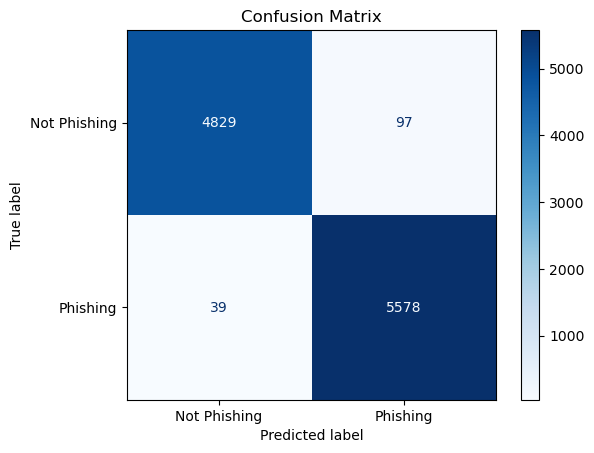

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

# Download NLTK resources (run once)
nltk.download("stopwords")
nltk.download("wordnet")

X = df[["clean_text", "day_of_week", "month", "year", "urls"]]
y = df["label"]  # 1 = phishing, 0 = not

# === Step 3: Build the model pipeline ===
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=1000), "clean_text"),
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["day_of_week", "month"]),
    ],
    remainder="passthrough",  # Pass through 'year', 'urls'
)

model = make_pipeline(
    preprocessor, LogisticRegression(max_iter=2000)
)  # Increased max_iter

# === Step 4: Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Step 5: Train the model ===
model.fit(X_train, y_train)

# === Step 6: Evaluate the model ===
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# === Step 7: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Phishing", "Phishing"]
)

plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Naive

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

nb_model = Pipeline(
    [("tfidf", TfidfVectorizer(max_features=1000)), ("clf", MultinomialNB())]
)

nb_model.fit(X_train["clean_text"], y_train)
y_pred_nb = nb_model.predict(X_test["clean_text"])

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9552309589300958
Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4926
           1       0.95      0.97      0.96      5617

    accuracy                           0.96     10543
   macro avg       0.96      0.95      0.95     10543
weighted avg       0.96      0.96      0.96     10543



In [ ]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train["clean_text"])
X_test_vec = vectorizer.transform(X_test["clean_text"])

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_vec, y_train)
y_pred_xgb = xgb_model.predict(X_test_vec)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:16:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9928862752537229
XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4926
           1       0.99      1.00      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



In [ ]:
%pip install --upgrade transformers


In [ ]:
%pip install -U "accelerate>=0.26.0"


In [ ]:
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset
import torch
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
train_texts = X_train["clean_text"].tolist()
test_texts = X_test["clean_text"].tolist()

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

train_dataset = Dataset.from_dict({**train_encodings, "label": y_train.tolist()})
test_dataset = Dataset.from_dict({**test_encodings, "label": y_test.tolist()})

# Load BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training arguments (no evaluation_strategy or save_strategy)
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_dir="./logs",
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train
trainer.train()

# Predict
preds = trainer.predict(test_dataset)
y_pred_bert = preds.predictions.argmax(-1)

# Evaluate
print("BERT Accuracy:", accuracy_score(y_test, y_pred_bert))
print("BERT Report:\n", classification_report(y_test, y_pred_bert))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.606200
20,0.289200
30,0.273800
40,0.226900
50,0.469100
60,0.084700
70,0.291200
80,0.111400
90,0.243500
100,0.245000


BERT Accuracy: 0.9975339087546239
BERT Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543

